In [1]:
import numpy as np
import pygimli as pg
from pygimli.frameworks.lsqrinversion import LSQRInversion
from pygimli.physics.ert import VESModelling

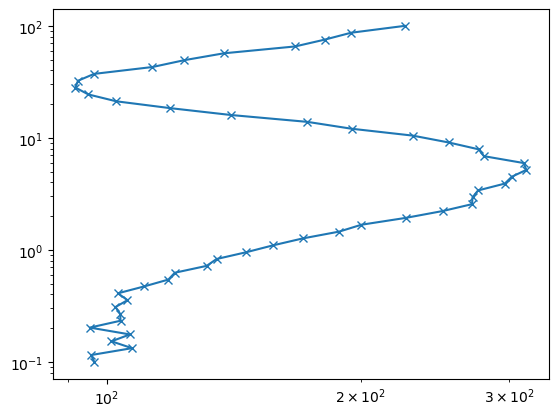

In [2]:
nlay = 4  # number of layers
lam = 200.  # (initial) regularization parameter
errPerc = 3.  # relative error of 3 percent
ab2 = np.logspace(-1, 2, 50)  # AB/2 distance (current electrodes)
mn2 = ab2 / 3.  # MN/2 distance (potential electrodes)
f = VESModelling(ab2=ab2, mn2=mn2, nLayers=nlay)
synres = [100., 500., 20., 800.]  # synthetic resistivity
synthk = [0.5, 3.5, 6.]  # synthetic thickness (nlay-th layer is infinite)
rhoa = f(synthk+synres)
rhoa = rhoa * (pg.randn(len(rhoa)) * errPerc / 100. + 1.)
pg.plt.loglog(rhoa, ab2, "x-");

In [3]:
tLog = pg.trans.TransLog()
inv = LSQRInversion(fop=f, verbose=True)
inv.LSQRiter = 20
# inv = pg.Inversion(fop=f)
inv.dataTrans = tLog
inv.modelTrans = tLog
startModel = pg.cat(pg.Vector(nlay-1, 8), pg.Vector(nlay, pg.median(rhoa)))
inv.inv.setMarquardtScheme()
model1 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model1)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))
G = pg.Matrix(rows=1, cols=len(startModel))
for i in range(3):
    G.setVal(0, i, 1)

c = pg.Vector(1, pg.sum(synthk))
inv.setParameterConstraints(G, c, 100)
model2 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model2)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))

08/03/23 - 09:20:48 - pyGIMLi - INFO - Starting inversion.
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


fop: <pygimli.physics.ert.vesModelling.VESModelling object at 0x000001982A6620E0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x000001982AE5A900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001982AD899A0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001982AD89880>
min/max (data): 91.81/314
min/max (error): 3%/3%
min/max (start model): 8/139
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 179.26 (dPhi = 9.19%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 175.15 (dPhi = 2.3%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 171.54 (dPhi = 2.06%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 165.81 (dPhi = 3.34%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 141.76 (dPhi = 14.5%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... chi² = 62.79 (dPhi = 55.7%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... 

08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - INFO - Starting inversion.
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 15.69 (dPhi = 75.02%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 8 ... chi² = 1.96 (dPhi = 87.5%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 9 ... chi² = 0.86 (dPhi = 56.23%) lam: 1000.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.86)                   #
################################################################################
7 [0.49043711513641575, 3.39086120992642, 9.879265155212504, 100.05907106972306, 495.28472519432114, 32.44357987963992, 821.2090891772599]
0.8580786734372567 2.766264930622626 13.76056348027534
fop: <pygimli.physics.ert.vesModelling.VESModelling object at 0x000001982A6620E0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x000001982AE5A900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000019

08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:49 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:50 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 173.09 (dPhi = 12.31%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 168.92 (dPhi = 2.41%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 155.96 (dPhi = 7.67%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 113.35 (dPhi = 27.32%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... 

08/03/23 - 09:20:50 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:50 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
08/03/23 - 09:20:50 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 82.45 (dPhi = 27.26%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... chi² = 32.07 (dPhi = 61.1%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... chi² = 6.21 (dPhi = 80.64%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 8 ... chi² = 0.88 (dPhi = 85.83%) lam: 1000.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.88)                   #
################################################################################
7 [0.48472655485865035, 3.5547044121547438, 5.992545667960494, 100.13927832567316, 491.1355347577737, 20.1125699084641, 742.3851987437098]
0.8797705833867393 2.809241189550391 10.031976634973887


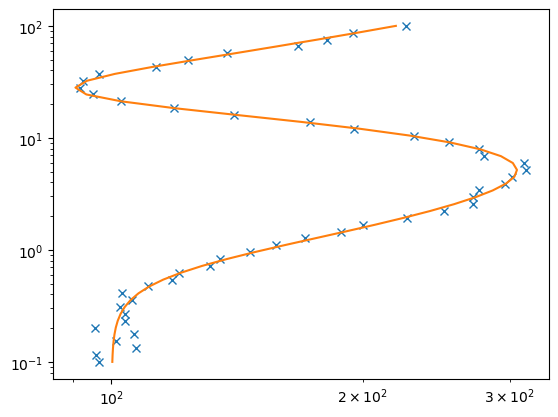

In [4]:
# model response
fig, ax = pg.plt.subplots()
ax.loglog(rhoa, ab2, "x")
ax.loglog(inv.response, ab2, "-")

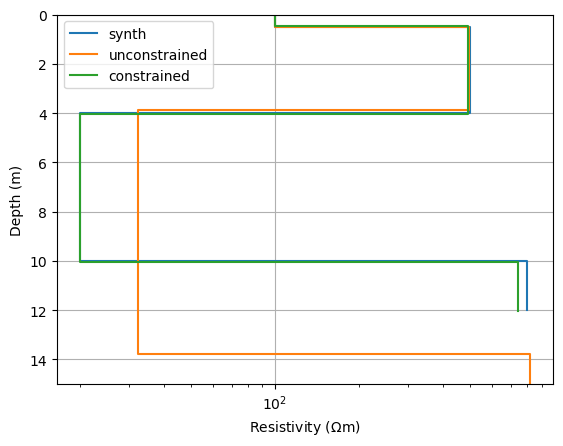

In [5]:
# the models
fig, ax = pg.plt.subplots()
pg.viewer.mpl.drawModel1D(ax, synthk, synres, plot="semilogx", label="synth")
pg.viewer.mpl.drawModel1D(ax, model=model1, label="unconstrained")
pg.viewer.mpl.drawModel1D(ax, model=model2, label="constrained")
ax.set_ylim(15, 0)
ax.grid(True)
ax.legend();